<a href="https://colab.research.google.com/github/Existanze54/sirius-machine-learning-2024/blob/main/Seminars/Solutions/S7s_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основные методы ML

### Семинар 7: Методы кластеризации. Связь со снижением размерности

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

### Задача 1: Кластеризация и снижение размерности

Загрузим датасет со скорректированным batch-эффектом с прошлого семинара:

In [ ]:
!wget https://data.bioml.ru/htdocs/courses/bioml/classic_ml/unsupervised/dim_reduction/data/gse53625.tar.gz -O gse53625.tar.gz
!tar xvzf gse53625.tar.gz

--2024-11-19 03:36:38--  https://data.bioml.ru/htdocs/courses/bioml/classic_ml/unsupervised/dim_reduction/data/gse53625.tar.gz
Resolving data.bioml.ru (data.bioml.ru)... 188.120.231.217
Connecting to data.bioml.ru (data.bioml.ru)|188.120.231.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1666446 (1.6M) [application/x-gzip]
Saving to: ‘gse53625.tar.gz’

gse53625.tar.gz     100%[===================>]   1.59M  2.15MB/s    in 0.7s    

2024-11-19 03:36:40 (2.15 MB/s) - ‘gse53625.tar.gz’ saved [1666446/1666446]

data/gse53625_expression.csv
data/gse53625_metadata.csv


In [ ]:
escc = pd.read_csv("./data/gse53625_expression.csv", index_col=0)
escc_meta = pd.read_csv("./data/gse53625_metadata.csv", index_col=0)

In [ ]:
X = escc.values.T
y = escc_meta["Sample type"]
batch = escc_meta["Dataset"]

In [ ]:
!wget https://data.bioml.ru/htdocs/courses/bioml/classic_ml/unsupervised/dim_reduction/data/gse53625_expression_corrected.csv -O ./data/gse53625_expression_corrected.csv

--2024-11-19 04:03:36--  https://data.bioml.ru/htdocs/courses/bioml/classic_ml/unsupervised/dim_reduction/data/gse53625_expression_corrected.csv
Resolving data.bioml.ru (data.bioml.ru)... 188.120.231.217
Connecting to data.bioml.ru (data.bioml.ru)|188.120.231.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13134765 (13M) [text/csv]
Saving to: ‘./data/gse53625_expression_corrected.csv’

./data/gse53625_exp 100%[===================>]  12.53M  8.43MB/s    in 1.5s    

2024-11-19 04:03:38 (8.43 MB/s) - ‘./data/gse53625_expression_corrected.csv’ saved [13134765/13134765]



In [ ]:
# все переменные с припиской сor основаны на скорректированных данных по батч эффекту

In [ ]:
escc_cor = pd.read_csv('./data/gse53625_expression_corrected.csv', index_col=0)
X_cor = escc_cor.values.T

Осуществите **стандартизацию данных**.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_cor_scaled = scaler.fit_transform(X_cor)

Произведите **обучение модели** t-SNE и **визуализацию**.

_Указание_: Задайте параметры t-SNE `perplexity=3.0`, `random_state=42`.

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=3.0, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
X_cor_tsne = tsne.fit_transform(X_cor_scaled)

<Axes: >

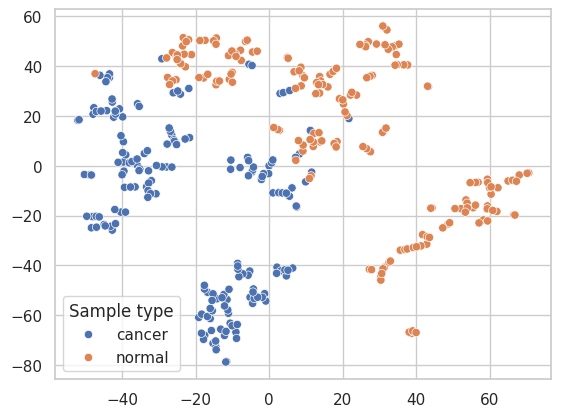

In [ ]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y)

<Axes: >

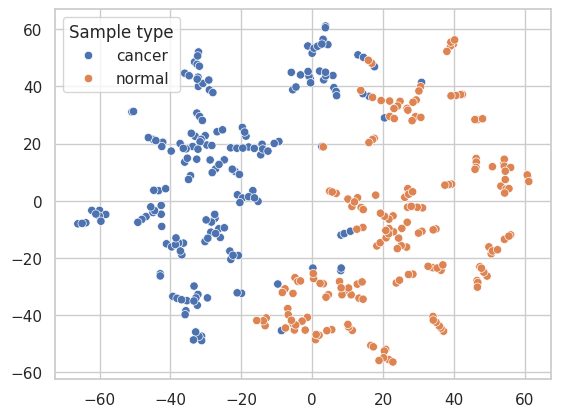

In [ ]:
sns.scatterplot(x=X_cor_tsne[:, 0], y=X_cor_tsne[:, 1], hue=y)

<Axes: >

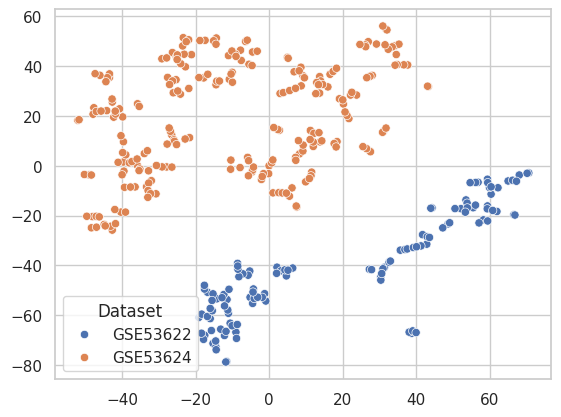

In [ ]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=batch)

<Axes: >

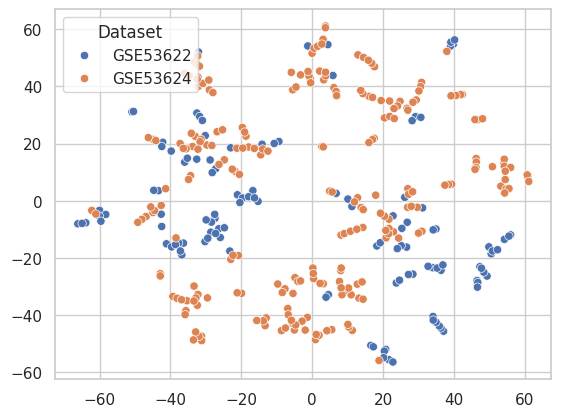

In [ ]:
sns.scatterplot(x=X_cor_tsne[:, 0], y=X_cor_tsne[:, 1], hue=batch)

**Обучите модель K-Means** на данных сниженной размерности.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
tag_km = kmeans.fit_predict(X_tsne)
tag_km_cor = kmeans.fit_predict(X_cor_tsne)

<Axes: >

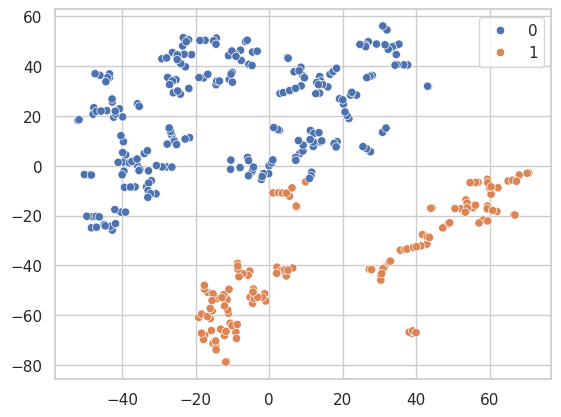

In [ ]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=tag_km)

<Axes: >

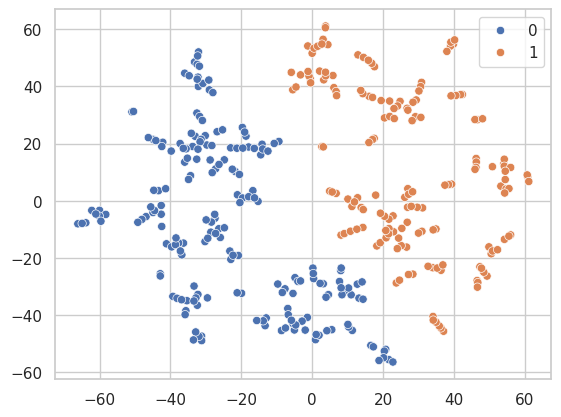

In [ ]:
sns.scatterplot(x=X_cor_tsne[:, 0], y=X_cor_tsne[:, 1], hue=tag_km_cor)

Посчитайте **индекс Рэнда** для полученного разбиения.

In [ ]:
pd.crosstab(tag_km, batch)

Dataset,GSE53622,GSE53624
row_0,,
0,0,229
1,120,9


In [ ]:
pd.crosstab(tag_km_cor, batch)

Dataset,GSE53622,GSE53624
row_0,,
0,66,129
1,54,109


In [ ]:
pd.crosstab(tag_km_cor, y)

Sample type,cancer,normal
row_0,,
0,143,52
1,36,127


In [ ]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(tag_km, batch)

0.9009011867237953

Теперь **обучите K-Means на исходных данных** и отобразите полученные метки на графике t-SNE.

In [ ]:
kmeans = KMeans(n_clusters=2)
tag_km_scaled = kmeans.fit_predict(X_scaled)

<Axes: >

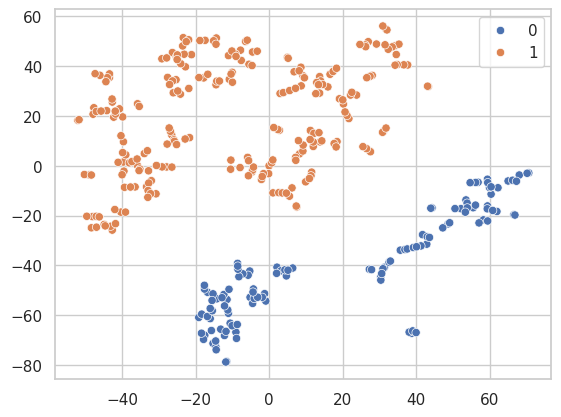

In [ ]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=tag_km_scaled)

Посчитайте индекс Рэнда еще раз.

In [ ]:
pd.crosstab(tag_km, batch)

Sample type,cancer,normal
row_0,,
0,119,119
1,60,60


In [ ]:
adjusted_rand_score(tag_km, batch)

1.0

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
tag4_km = kmeans.fit_predict(X_tsne)
tag4_km_cor = kmeans.fit_predict(X_cor_tsne)

<Axes: >

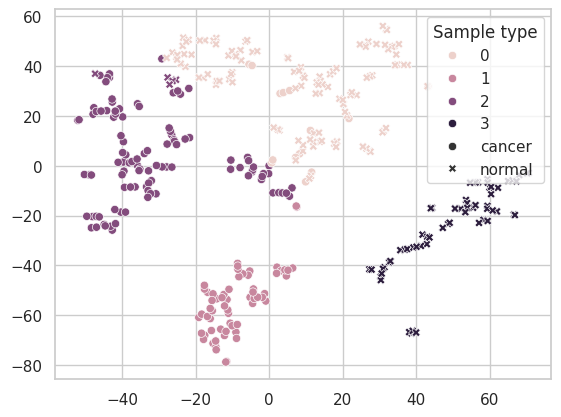

In [ ]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=tag4_km, style=y)

In [ ]:
kmeans = KMeans(n_clusters=4)
tag4_km_scaled = kmeans.fit_predict(X_scaled)

<Axes: >

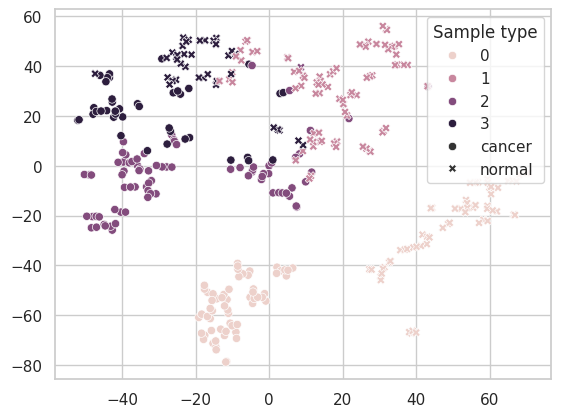

In [ ]:
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=tag4_km_scaled, style=y)

**Ответьте на вопросы**:

* Когда надо осуществлять кластеризацию: до снижения размерности или после?
* Подходит ли для этой задачи метод DBSCAN? Объясните свой ответ.

---